In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import missingno as msno
%matplotlib inline
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format','{:.2f}'.format)

### Exploratory Data Analysis

#### User Data

In [10]:
df1 = pd.read_csv("User (1).csv").iloc[:,1:]
df1.head(3)

,User ID,Name,Email
0,4c731e48-0377-4d7d-b4c8-b2174b774ed8,Gary Hill,GHbnuothhymw
1,95258c36-5b6b-4591-85ee-0c43f503c1d5,Michael Deering,MD@gmail.com
2,a8229d24-f219-4930-a382-24049a8f73bb,Richard Bain,RB@gmail.com


In [12]:
df2 = pd.read_csv("Profile (1).csv").iloc[:,1:]
df2.head(3)

,User ID,Interests,Age
0,4c731e48-0377-4d7d-b4c8-b2174b774ed8,"[0, 1]",41
1,95258c36-5b6b-4591-85ee-0c43f503c1d5,['tennis'],23
2,a8229d24-f219-4930-a382-24049a8f73bb,"['fitness', 'cooking', 'animals', 'travel']",25


In [14]:
df3 = pd.read_csv("Location (1).csv").iloc[:,1:]
df3.head(3)

,User ID,Address
0,4c731e48-0377-4d7d-b4c8-b2174b774ed8,"6208 Wright Mountains\nBryantfurt, AR 02531"
1,95258c36-5b6b-4591-85ee-0c43f503c1d5,"534 Williams Turnpike Suite 788\nPort Julie, W..."
2,a8229d24-f219-4930-a382-24049a8f73bb,"867 Lisa Causeway Apt. 015\nWest Brentmouth, A..."


In [15]:
df4 = pd.read_csv("Session (1).csv").iloc[:,1:]
df4.head(3)

,User ID,Device,Duration
0,4c731e48-0377-4d7d-b4c8-b2174b774ed8,Microsoft,11
1,95258c36-5b6b-4591-85ee-0c43f503c1d5,Apple,51
2,a8229d24-f219-4930-a382-24049a8f73bb,HTC,25


In [57]:
user_merge = pd.concat([df1,df2,df3,df4], axis=1)

In [59]:
user_merge.head(3)

,User ID,Name,Email,User ID,Interests,Age,User ID,Address,User ID,Device,Duration
0,4c731e48-0377-4d7d-b4c8-b2174b774ed8,Gary Hill,GHbnuothhymw,4c731e48-0377-4d7d-b4c8-b2174b774ed8,"[0, 1]",41,4c731e48-0377-4d7d-b4c8-b2174b774ed8,"6208 Wright Mountains\nBryantfurt, AR 02531",4c731e48-0377-4d7d-b4c8-b2174b774ed8,Microsoft,11
1,95258c36-5b6b-4591-85ee-0c43f503c1d5,Michael Deering,MD@gmail.com,95258c36-5b6b-4591-85ee-0c43f503c1d5,['tennis'],23,95258c36-5b6b-4591-85ee-0c43f503c1d5,"534 Williams Turnpike Suite 788\nPort Julie, W...",95258c36-5b6b-4591-85ee-0c43f503c1d5,Apple,51
2,a8229d24-f219-4930-a382-24049a8f73bb,Richard Bain,RB@gmail.com,a8229d24-f219-4930-a382-24049a8f73bb,"['fitness', 'cooking', 'animals', 'travel']",25,a8229d24-f219-4930-a382-24049a8f73bb,"867 Lisa Causeway Apt. 015\nWest Brentmouth, A...",a8229d24-f219-4930-a382-24049a8f73bb,HTC,25


----------------------

#### Content Data

In [21]:
df5 = pd.read_csv("Content (1).csv").iloc[:,1:]

In [22]:
df5.drop(['User ID','URL'], axis=1, inplace=True)

In [23]:
df5.head(3)

,Content ID,Type,Category
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying
1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,photo,healthy eating
2,230c4e4d-70c3-461d-b42c-ec09396efb3f,photo,healthy eating


In [50]:
df5.nunique()

Content ID    1000
Type             4
Category        41
dtype: int64

In [55]:
df5.Type.value_counts()

photo    261
video    259
GIF      244
audio    236
Name: Type, dtype: int64

#### Reaction Data

In [17]:
df6 = pd.read_csv("Reactions (1).csv").iloc[:,1:]
df6.head(3)

,Content ID,User ID,Type,Datetime
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,NaN,NaN,2021-04-22 15:17:15
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,5d454588-283d-459d-915d-c48a2cb4c27f,disgust,2020-11-07 09:43:50
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,92b87fa5-f271-43e0-af66-84fac21052e6,dislike,2021-06-17 12:22:51


In [19]:
df7 = pd.read_csv("ReactionTypes (1).csv").iloc[:,1:]
df7.head(3)

,Type,Sentiment,Score
0,heart,positive,60
1,want,positive,70
2,disgust,negative,0


In [25]:
react_merge = pd.merge(left=df6, right=df7, how="inner", on="Type")
react_merge.head(3)

,Content ID,User ID,Type,Datetime,Sentiment,Score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,5d454588-283d-459d-915d-c48a2cb4c27f,disgust,2020-11-07 09:43:50,negative,0
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,34e8add9-0206-47fd-a501-037b994650a2,disgust,2021-01-06 19:13:01,negative,0
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,13c06e7e-833d-47eb-a790-5e09ccfd8d2c,disgust,2021-04-09 02:46:20,negative,0


##### Merge react and Content Data

In [62]:
content_react = pd.merge(left=df5, right=react_merge, how="inner", on="Content ID")

In [85]:
content_react['Datetime'] = pd.to_datetime(content_react['Datetime'])

In [86]:
content_react.head()

,Content ID,Type_x,Category,User ID,Type_y,Datetime,Sentiment,Score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,5d454588-283d-459d-915d-c48a2cb4c27f,disgust,2020-11-07 09:43:50,negative,0
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,34e8add9-0206-47fd-a501-037b994650a2,disgust,2021-01-06 19:13:01,negative,0
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,13c06e7e-833d-47eb-a790-5e09ccfd8d2c,disgust,2021-04-09 02:46:20,negative,0
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,92b87fa5-f271-43e0-af66-84fac21052e6,dislike,2021-06-17 12:22:51,negative,10
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,69532ce2-1ffe-4187-8042-0230d115b24e,dislike,2020-11-09 02:49:59,negative,10


----------------------------------

In [72]:
user_merge = user_merge[['User ID','Name','Email','Interests','Age','Address','Device','Duration']].iloc[:,3:]

In [74]:
user_merge.head(3)

,User ID,Name,Email,Interests,Age,Address,Device,Duration
0,4c731e48-0377-4d7d-b4c8-b2174b774ed8,Gary Hill,GHbnuothhymw,"[0, 1]",41,"6208 Wright Mountains\nBryantfurt, AR 02531",Microsoft,11
1,95258c36-5b6b-4591-85ee-0c43f503c1d5,Michael Deering,MD@gmail.com,['tennis'],23,"534 Williams Turnpike Suite 788\nPort Julie, W...",Apple,51
2,a8229d24-f219-4930-a382-24049a8f73bb,Richard Bain,RB@gmail.com,"['fitness', 'cooking', 'animals', 'travel']",25,"867 Lisa Causeway Apt. 015\nWest Brentmouth, A...",HTC,25


In [80]:
user_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   User ID    500 non-null    object
 1   Name       500 non-null    object
 2   Email      500 non-null    object
 3   Interests  500 non-null    object
 4   Age        500 non-null    int64 
 5   Address    500 non-null    object
 6   Device     500 non-null    object
 7   Duration   500 non-null    int64 
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [65]:
content_react.head(3)

,Content ID,Type_x,Category,User ID,Type_y,Datetime,Sentiment,Score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,5d454588-283d-459d-915d-c48a2cb4c27f,disgust,2020-11-07 09:43:50,negative,0
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,34e8add9-0206-47fd-a501-037b994650a2,disgust,2021-01-06 19:13:01,negative,0
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,13c06e7e-833d-47eb-a790-5e09ccfd8d2c,disgust,2021-04-09 02:46:20,negative,0


In [87]:
content_react.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24573 entries, 0 to 24572
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Content ID  24573 non-null  object        
 1   Type_x      24573 non-null  object        
 2   Category    24573 non-null  object        
 3   User ID     22534 non-null  object        
 4   Type_y      24573 non-null  object        
 5   Datetime    24573 non-null  datetime64[ns]
 6   Sentiment   24573 non-null  object        
 7   Score       24573 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 1.7+ MB


----------------------------

### Data Analysis

##### User Analysis

In [118]:
user_merge.head(2)

,User ID,Name,Email,Interests,Age,Address,Device,Duration
0,4c731e48-0377-4d7d-b4c8-b2174b774ed8,Gary Hill,GHbnuothhymw,"[0, 1]",41,"6208 Wright Mountains\nBryantfurt, AR 02531",Microsoft,11
1,95258c36-5b6b-4591-85ee-0c43f503c1d5,Michael Deering,MD@gmail.com,['tennis'],23,"534 Williams Turnpike Suite 788\nPort Julie, W...",Apple,51


In [98]:
user_merge.Device.value_counts().head(7)

Microsoft    77
Motorola     77
Huawei       74
HTC          72
Apple        68
Samsung      65
Google       61
Name: Device, dtype: int64

In [116]:
user_merge['Duration'].describe()

count   500.00
mean     47.71
std      29.33
min       0.00
25%      20.75
50%      48.50
75%      73.25
max      99.00
Name: Duration, dtype: float64

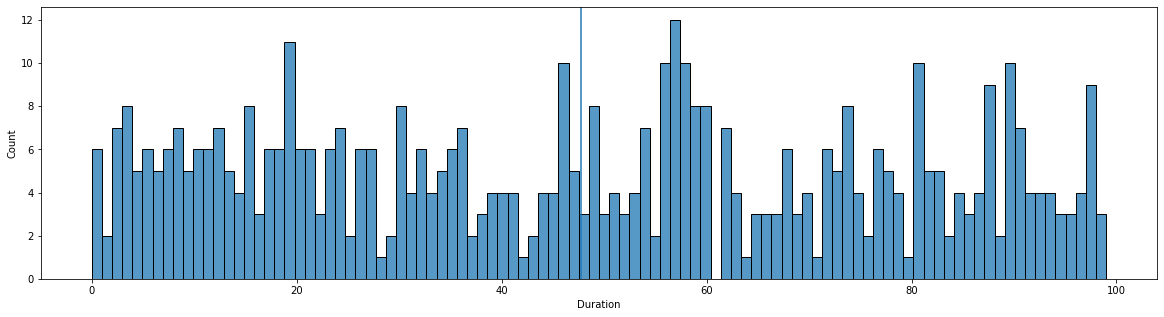

In [112]:
plt.figure(figsize=(20,5))
sns.histplot(x="Duration", data=user_merge,bins=100)
plt.axvline(user_merge.Duration.mean())

In [117]:
user_merge['Age'].describe()

count   500.00
mean     22.29
std      13.15
min       0.00
25%      10.75
50%      23.00
75%      34.00
max      44.00
Name: Age, dtype: float64

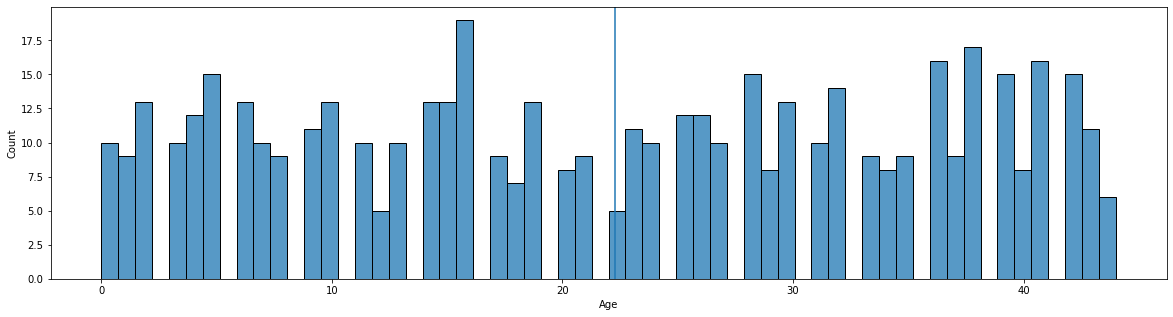

In [111]:
plt.figure(figsize=(20,5))
sns.histplot(x="Age", data=user_merge,bins=60)
plt.axvline(user_merge.Age.mean())

In [119]:
user_merge.Interests.value_counts()

['public speaking']                                       11
['science']                                               11
['education']                                              9
['animals']                                                9
['soccer']                                                 9
                                                          ..
['animals', 'fitness']                                     1
['science', 'education', 'veganism']                       1
['food', 'dogs', 'studying']                               1
['veganism', 'tennis', 'cooking']                          1
['education', 'science', 'animals', 'public speaking']     1
Name: Interests, Length: 366, dtype: int64

----------------

##### The client wanted to know which categories of their content had yielded the 
##### greatest popularity out of all their content.

In [136]:
content_react.head(2)

,Content ID,Type_x,Category,User ID,Type_y,Datetime,Sentiment,Score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,5d454588-283d-459d-915d-c48a2cb4c27f,disgust,2020-11-07 09:43:50,negative,0
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,34e8add9-0206-47fd-a501-037b994650a2,disgust,2021-01-06 19:13:01,negative,0


In [145]:
# Content Category and type Top 10 reach
content_react.groupby(['Type_x','Category'])[['Content ID']].count().reset_index().sort_values('Content ID', ascending = False).head(10)

,Type_x,Category,Content ID
62,photo,animals,610
47,audio,technology,556
35,audio,animals,541
90,video,dogs,520
66,photo,education,515
9,GIF,cooking,512
18,GIF,soccer,511
96,video,science,508
42,audio,healthy eating,503
20,GIF,technology,501


In [193]:
# Top high score category
content_react.groupby('Category').sum().sort_values('Score',ascending = False).head(5)

,Score
Category,
animals,69548
healthy eating,69067
technology,67472
science,66043
cooking,63982


In [146]:
# Content Category Top 10 reach with Positive sentiment
content_react[content_react.Sentiment == 'positive'].groupby(['Type_x','Category'])[['Content ID']].count()\
.reset_index().sort_values('Content ID', ascending = False).head(10)

,Type_x,Category,Content ID
61,photo,animals,331
46,audio,technology,330
34,audio,animals,309
41,audio,healthy eating,304
94,video,public speaking,294
9,GIF,cooking,291
65,photo,education,287
95,video,science,285
75,photo,travel,284
20,GIF,technology,284


In [194]:
# Top mean score Content
conscore = content_react.groupby('Content ID').mean().sort_values('Score',ascending = False).head(10).reset_index()
conscore1 = content_react[['Content ID','Type_x','Category']].merge(right = conscore, on = 'Content ID').sort_values('Score', ascending = False)
conscore1.drop_duplicates().reset_index(drop = True)

,Content ID,Type_x,Category,Score
0,ae909545-786e-4089-9ef3-61c3c9fd3efd,video,education,75.00
1,2073855c-fab2-41ee-ad15-d4269b2ac4bd,audio,education,72.40
2,ad5ddd13-b8ea-4174-ad71-da1663c7f959,video,Technology,72.33
3,c59e27e9-0439-4699-8ea0-5e93f662a05d,GIF,fitness,72.00
4,e5f1a4c6-2b27-4c8b-ac9a-21bb6ef7c946,audio,soccer,70.00
5,f7c26d94-b7c6-45a0-b882-354d8d89c2af,photo,science,69.00
6,d6c98c19-5733-47fd-9b03-e4574fbe4220,photo,travel,68.33
7,3ac5929e-9d68-4ec5-ba6f-a018d3d4da41,video,tennis,67.50
8,f43114af-edb4-4629-bc15-7a483cf3eaf4,photo,technology,67.50
9,a048f504-f428-438d-bb91-f1ad562ff5f8,video,public speaking,66.67
